In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression

In [11]:
data = pd.read_csv('DataSet5_2.csv', sep = ',')

data.head()

,count,holiday,humidity,registered,summer,temp,windspeed,workingday
0,2,0,81,2,0,10.66,22.0028,1
1,157,0,54,150,1,18.04,16.9979,1
2,233,0,40,199,1,37.72,15.0013,1
3,98,0,88,86,1,22.14,19.0012,1
4,6,0,74,6,0,6.56,6.0032,1


Разделение на выборки
---

In [12]:
# Разделение данных на тренировочную (80%) и тестовую (20%) выборки
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]


X_train = train_data[['holiday', 'humidity', 'registered', 'summer',
                 'temp', 'windspeed', 'workingday']]
y_train = train_data['count']
X_test = test_data[['holiday', 'humidity', 'registered', 'summer',
                 'temp', 'windspeed', 'workingday']]
y_test = test_data['count']

Регрессионаная модель

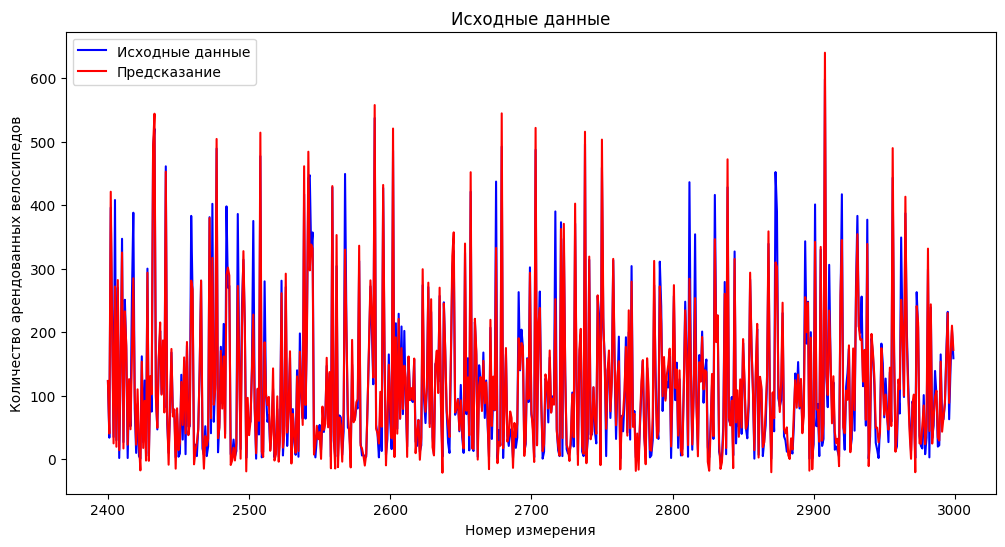

Mean Squared Error (MSE): 770.3191744027758
R-squared (R2): 0.9484470509653822


In [13]:
# Определение функции для аппроксимации
def mapping_func(x, a, b, c, d, e, f, g, i):
    return a + b * x['holiday'] + c * x['humidity'] + d * x['registered'] + e * x['summer'] + f * x['temp'] + g * x['windspeed'] + i * x['workingday']

# Подбор параметров
args, covar = curve_fit(mapping_func, X_train, y_train)

# Получение параметров
a, b, c, d, e, f, g, i = args[0], args[1], args[2], args[3], args[4], args[5], args[6], args[7]

# Создание предсказания
predictionTest = a + b * test_data['holiday'] + c * test_data['humidity'] + d * test_data['registered'] + e * test_data['summer'] + f * test_data['temp'] + g * test_data['windspeed'] + i * test_data['workingday']
predictionTrain = a + b * train_data['holiday'] + c * train_data['humidity'] + d * train_data['registered'] + e * train_data['summer'] + f * train_data['temp'] + g * train_data['windspeed'] + i * train_data['workingday']
predictionAll = list(predictionTrain) + list(predictionTest)


plt.figure(figsize=(12, 6))
plt.plot(test_data['count'].index, test_data['count'], label='Исходные данные', color = 'blue')
plt.plot(test_data['count'].index, predictionTest, label='Предсказание', color = 'red')
plt.xlabel('Номер измерения')
plt.ylabel('Количество арендованных велосипедов')
plt.legend()
plt.title('Исходные данные')
plt.show()
plt.show()

# Оценка модели
mse = mean_squared_error(test_data['count'], predictionTest)
r2 = r2_score(test_data['count'], predictionTest)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Эффективность при граничном значении

In [14]:
chosen1 = pd.DataFrame()
chosen2 = pd.DataFrame()

chosen1 = [1 if data['count'][i] > 100 else 0 for i in range(len(data))]
chosen2 = [1 if predictionAll[i] > 100 else 0 for i in range(len(predictionAll))]

In [15]:
accuracy = round(accuracy_score(chosen1, chosen2) * 100, 2)
precision = round(precision_score(chosen1, chosen2) * 100, 2)
recall = round(recall_score(chosen1, chosen2) * 100, 2)
f1 = round(f1_score(chosen1, chosen2) * 100, 2)
roc_auc = round(roc_auc_score(chosen1, chosen2) * 100, 2)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

Precision: 93.65
Recall: 98.1
F1-score: 95.83
Accuracy: 96.1
ROC AUC: 96.26


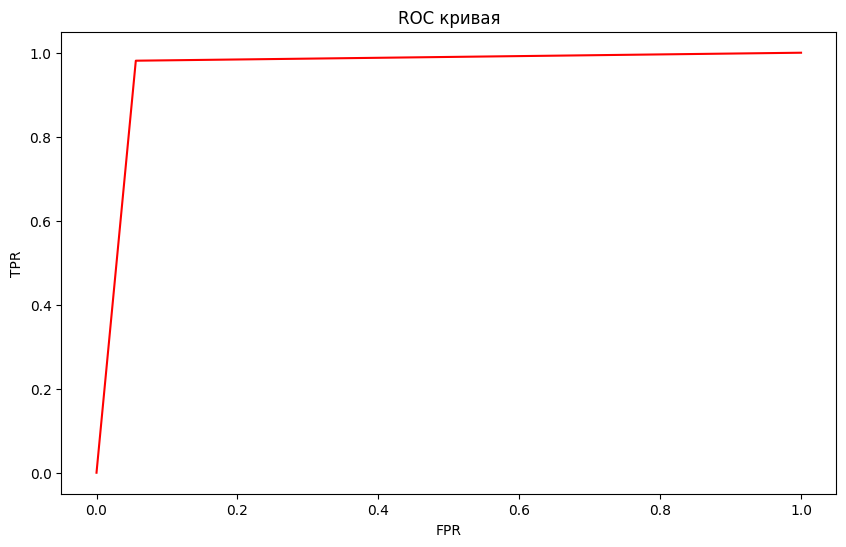

In [16]:
fpr, tpr, _ = roc_curve(chosen1, chosen2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr, color='red', linestyle='solid')
ax.set(title="ROC кривая", xlabel="FPR", ylabel="TPR")
plt.show()

Классификация

In [17]:
# Подготовка данных
X = data[['holiday', 'humidity', 'registered', 'summer', 'temp', 'windspeed', 'workingday']]
y = chosen1  # целевая переменная, где 1 - эффективный день, 0 - неэффективный

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Оценка модели
accuracyK = round(accuracy_score(y_test, y_pred) * 100, 2)
precisionK = round(precision_score(y_test, y_pred) * 100, 2)
recallK = round(recall_score(y_test, y_pred) * 100, 2)
f1K = round(f1_score(y_test, y_pred) * 100, 2)
roc_aucK = round(roc_auc_score(y_test, y_pred) * 100, 2)

print(f"Precision: {precisionK}")
print(f"Recall: {recallK}")
print(f"F1-score: {f1K}")
print(f"Accuracy: {accuracyK}")
print(f"ROC AUC: {roc_aucK}")


Precision: 96.92
Recall: 98.82
F1-score: 97.86
Accuracy: 98.17
ROC AUC: 98.25


/Users/andrejsmirnov/PycharmProjects/ML2/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


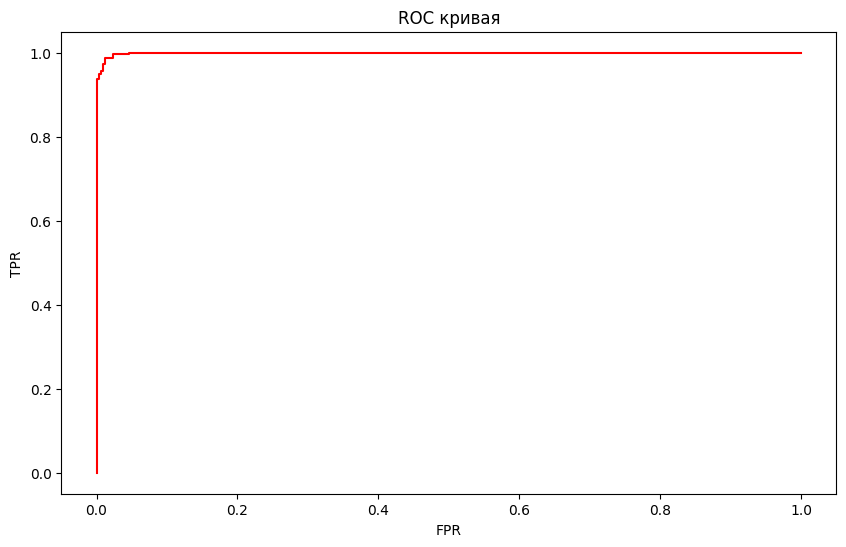

In [18]:
y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr, color='red', linestyle='solid')
ax.set(title="ROC кривая", xlabel="FPR", ylabel="TPR")
plt.show()

Сравнение

In [19]:
accuracyR = round((accuracyK - accuracy), 2)
precisionR = round((precisionK - precision), 2)
recallR = round((recallK - recall), 2)
f1R = round((f1K - f1), 2)
roc_aucR = round((roc_aucK - roc_auc), 2)

print("Разница между классификацией и регрессией:")
print(f"PrecisionK - Precision: {precisionR}")
print(f"Recall: {recallR}")
print(f"F1-score: {f1R}")
print(f"Accuracy: {accuracyR}")
print(f"ROC AUC: {roc_aucR}")

Разница между классификацией и регрессией:
PrecisionK - Precision: 3.27
Recall: 0.72
F1-score: 2.03
Accuracy: 2.07
ROC AUC: 1.99


классификация лучше